In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_all=pd.read_csv(r'C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Visualisation\Visualize_all_data.cleaned.csv')
df= pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
df.shape
df_BOW=pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling_BagofWords.parquet")

df_BOW=df_BOW.sample(frac=1,random_state=42)


In [3]:
#df.dropna(axis=0, inplace=True)
df_all=df_all.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57722 entries, 46996 to 15795
Columns: 1013 entries, label to BOW_young
dtypes: float64(9), int32(2), int64(1002)
memory usage: 446.1 MB


In [4]:
df_new_features=df_BOW
#df_new_features.info()
df_new_features.shape

(61719, 1024)

In [5]:

df_new_features.iloc[:, :-1000].describe()

,label,word_count,avg_sentence_length,text_punctuation_frequency,text_capitalization_frequency,title_punctuation_frequency,title_capitalization_frequency,title_before_character_removal,text_before_character_removal,title_after_character_removal,text_after_character_removal,subjectivity_text,subjectivity_title,title_sentiment,text_sentiment,title_reading_ease,text_reading_ease,text_lexical_diversity,title_lexical_diversity
count,61719.000000,61719.000000,61716.000000,61719.0,61719.000000,61719.0,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000
mean,0.442068,632.737083,30.148830,0.0,9.301026,0.0,1.111343,75.249486,3335.958603,72.514639,3213.814579,0.372131,0.225813,-0.104698,-0.002926,67.891194,-242.562373,0.695631,0.989505
std,0.496637,714.952566,11.876844,0.0,15.780880,0.0,2.044250,22.544133,3643.617011,21.822781,3471.998371,0.134930,0.294269,0.358195,0.819823,26.368987,334.277758,0.108317,0.060246
min,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.966600,-1.000000,-1993.790000,-12236.080000,0.000000,0.000000
25%,0.000000,282.000000,24.279767,0.0,3.000000,0.0,0.000000,61.000000,1512.000000,60.000000,1452.500000,0.300265,0.000000,-0.361200,-0.919450,53.880000,-319.475000,0.626087,1.000000
50%,0.000000,461.000000,28.470588,0.0,6.000000,0.0,0.000000,72.000000,2490.000000,70.000000,2407.000000,0.376250,0.000000,0.000000,0.000000,68.770000,-164.350000,0.689655,1.000000
75%,1.000000,776.000000,33.500000,0.0,11.000000,0.0,1.000000,86.000000,4132.000000,83.000000,3982.500000,0.448641,0.454545,0.000000,0.900100,83.320000,-71.980000,0.757036,1.000000
max,1.000000,28009.000000,516.571429,0.0,909.000000,0.0,24.000000,456.000000,142961.000000,443.000000,129415.000000,1.000000,1.000000,0.945100,1.000000,206.840000,206.840000,1.000000,1.000000


In [6]:
df_new_features.drop(columns=['index','text','title','title_processed','text_processed',
                              'text_punctuation_frequency','title_punctuation_frequency','title_capitalization_frequency'
                              ,'title_after_character_removal','text_after_character_removal','subjectivity_title'
                             ,],inplace=True)
df_new_features.iloc[:, :-1000].describe()

,label,word_count,avg_sentence_length,text_capitalization_frequency,title_before_character_removal,text_before_character_removal,subjectivity_text,title_sentiment,text_sentiment,title_reading_ease,text_reading_ease,text_lexical_diversity,title_lexical_diversity
count,61719.000000,61719.000000,61716.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000,61719.000000
mean,0.442068,632.737083,30.148830,9.301026,75.249486,3335.958603,0.372131,-0.104698,-0.002926,67.891194,-242.562373,0.695631,0.989505
std,0.496637,714.952566,11.876844,15.780880,22.544133,3643.617011,0.134930,0.358195,0.819823,26.368987,334.277758,0.108317,0.060246
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-0.966600,-1.000000,-1993.790000,-12236.080000,0.000000,0.000000
25%,0.000000,282.000000,24.279767,3.000000,61.000000,1512.000000,0.300265,-0.361200,-0.919450,53.880000,-319.475000,0.626087,1.000000
50%,0.000000,461.000000,28.470588,6.000000,72.000000,2490.000000,0.376250,0.000000,0.000000,68.770000,-164.350000,0.689655,1.000000
75%,1.000000,776.000000,33.500000,11.000000,86.000000,4132.000000,0.448641,0.000000,0.900100,83.320000,-71.980000,0.757036,1.000000
max,1.000000,28009.000000,516.571429,909.000000,456.000000,142961.000000,1.000000,0.945100,1.000000,206.840000,206.840000,1.000000,1.000000


(61719, 1013)


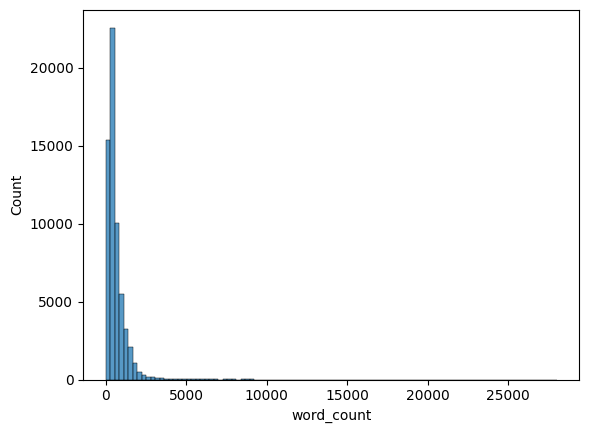

label
0.0    34435
1.0    27284
Name: count, dtype: int64
count    60039.000000
mean       554.345242
std        404.906976
min          0.000000
25%        275.000000
50%        452.000000
75%        734.000000
max       2000.000000
Name: word_count, dtype: float64


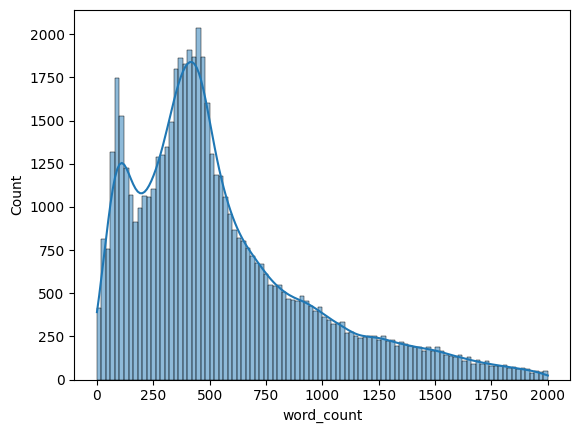

label
0.0    33547
1.0    26492
Name: count, dtype: int64
(60039, 1013)


In [7]:
print(df_new_features.shape)
sns.histplot(df_new_features['word_count'], bins=100, kde=False)
plt.show()
print(df_new_features['label'].value_counts())
df_new_features = df_new_features[df_new_features['word_count'] <= 2000]
print(df_new_features['word_count'].describe())

sns.histplot(df_new_features['word_count'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
print(df_new_features.shape)

(60039, 1013)


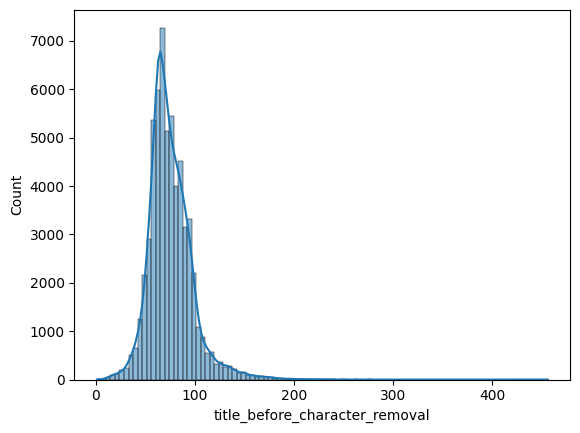

label
0.0    33547
1.0    26492
Name: count, dtype: int64
count    59062.000000
mean        73.923318
std         19.177460
min         10.000000
25%         61.000000
50%         72.000000
75%         86.000000
max        140.000000
Name: title_before_character_removal, dtype: float64


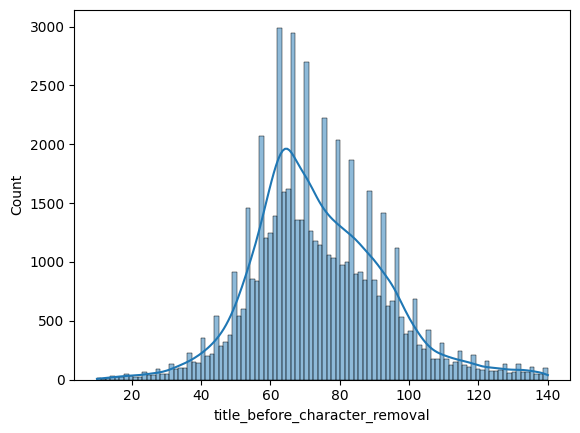

label
0.0    33540
1.0    25522
Name: count, dtype: int64
(59062, 1013)


In [8]:
print(df_new_features.shape)
sns.histplot(df_new_features['title_before_character_removal'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
df_new_features = df_new_features[(df_new_features['title_before_character_removal'] >= 10) & (df_new_features['title_before_character_removal'] <= 140)]
print(df_new_features['title_before_character_removal'].describe())

sns.histplot(df_new_features['title_before_character_removal'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
print(df_new_features.shape)

(59062, 1013)


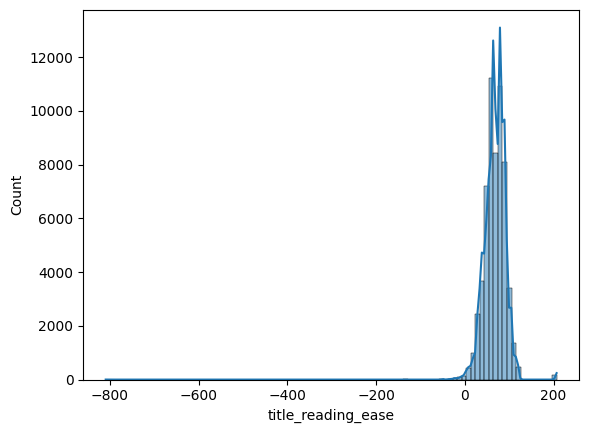

label
0.0    33540
1.0    25522
Name: count, dtype: int64
count    57744.000000
mean        69.033604
std         19.907768
min         20.040000
25%         55.910000
50%         69.790000
75%         83.320000
max        121.220000
Name: title_reading_ease, dtype: float64


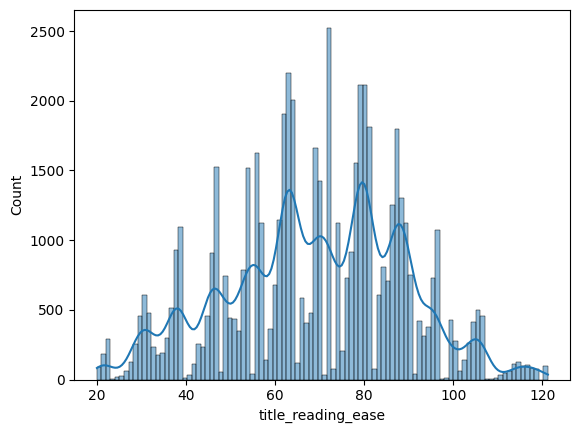

label
0.0    32840
1.0    24904
Name: count, dtype: int64
(57744, 1013)


In [9]:
print(df_new_features.shape)
sns.histplot(df_new_features['title_reading_ease'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
df_new_features = df_new_features[(df_new_features['title_reading_ease'] >= 20) & (df_new_features['title_reading_ease'] <= 150)]
print(df_new_features['title_reading_ease'].describe())

sns.histplot(df_new_features['title_reading_ease'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
print(df_new_features.shape)

(57744, 1013)


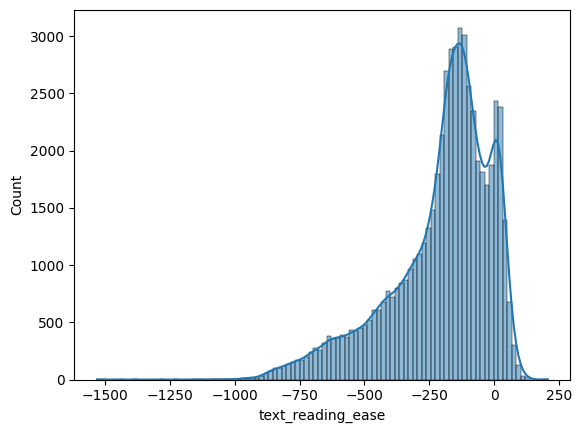

label
0.0    32840
1.0    24904
Name: count, dtype: int64
count    57722.000000
mean      -206.442582
std        197.265562
min       -982.780000
25%       -299.687500
50%       -159.950000
75%        -69.280000
max        206.840000
Name: text_reading_ease, dtype: float64


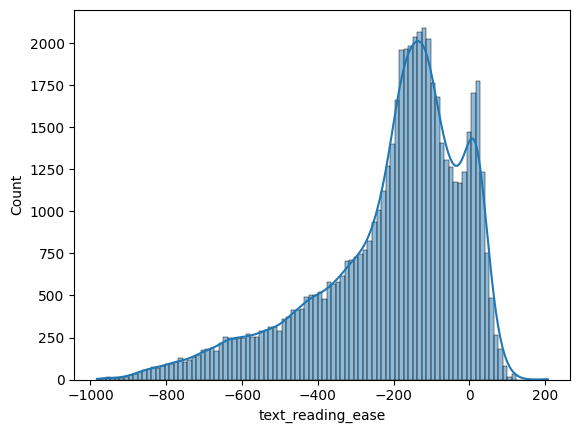

label
0.0    32840
1.0    24882
Name: count, dtype: int64
(57722, 1013)


In [10]:
print(df_new_features.shape)
sns.histplot(df_new_features['text_reading_ease'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
df_new_features = df_new_features[(df_new_features['text_reading_ease'] >= -1000) & (df_new_features['text_reading_ease'] <= 250)]
print(df_new_features['text_reading_ease'].describe())

sns.histplot(df_new_features['text_reading_ease'], bins=100, kde=True)
plt.show()
print(df_new_features['label'].value_counts())
print(df_new_features.shape)

In [11]:
df_new_features.iloc[:, :-1000].describe()

,label,word_count,avg_sentence_length,text_capitalization_frequency,title_before_character_removal,text_before_character_removal,subjectivity_text,title_sentiment,text_sentiment,title_reading_ease,text_reading_ease,text_lexical_diversity,title_lexical_diversity
count,57722.000000,57722.000000,57720.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000,57722.000000
mean,0.431066,554.297495,30.148018,8.062091,74.075708,2934.051748,0.372461,-0.104813,-0.005147,69.038400,-206.442582,0.701034,0.992819
std,0.495230,404.868859,11.294351,9.010203,19.066811,2096.069042,0.135089,0.356844,0.815989,19.907683,197.265562,0.101772,0.030159
min,0.000000,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000,-0.964300,-0.999800,20.040000,-982.780000,0.000000,0.333333
25%,0.000000,275.000000,24.375000,3.000000,62.000000,1476.000000,0.300000,-0.361200,-0.915300,55.910000,-299.687500,0.631579,1.000000
50%,0.000000,452.000000,28.527309,6.000000,72.000000,2441.000000,0.375923,0.000000,0.000000,69.790000,-159.950000,0.692737,1.000000
75%,1.000000,735.000000,33.520000,10.000000,86.000000,3919.000000,0.449706,0.000000,0.893375,83.320000,-69.280000,0.759124,1.000000
max,1.000000,2000.000000,430.000000,273.000000,140.000000,11294.000000,1.000000,0.933700,0.999900,121.220000,206.840000,1.000000,1.000000


In [12]:
df_new_features.to_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
df_new_features_2=df_new_features.iloc[:, :-1000]
df_new_features_2.to_csv(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\Tableau.csv")

df_new_features_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57722 entries, 46996 to 15795
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           57722 non-null  float64
 1   word_count                      57722 non-null  int32  
 2   avg_sentence_length             57720 non-null  float64
 3   text_capitalization_frequency   57722 non-null  int32  
 4   title_before_character_removal  57722 non-null  int64  
 5   text_before_character_removal   57722 non-null  int64  
 6   subjectivity_text               57722 non-null  float64
 7   title_sentiment                 57722 non-null  float64
 8   text_sentiment                  57722 non-null  float64
 9   title_reading_ease              57722 non-null  float64
 10  text_reading_ease               57722 non-null  float64
 11  text_lexical_diversity          57722 non-null  float64
 12  title_lexical_diversity         5

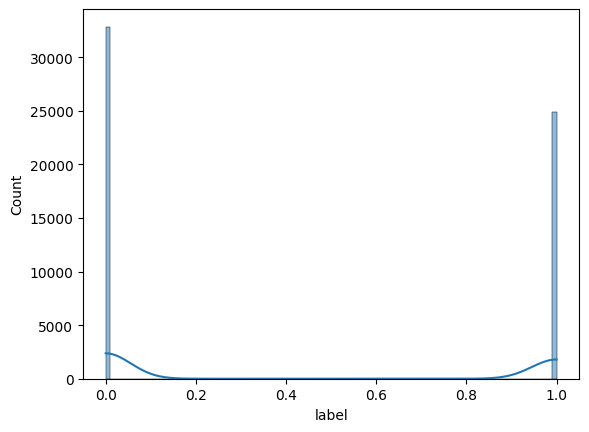

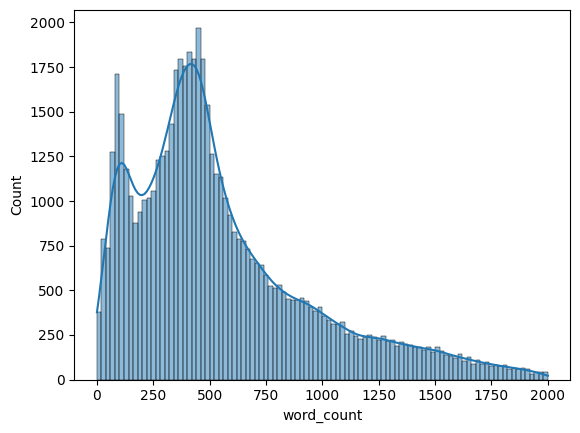

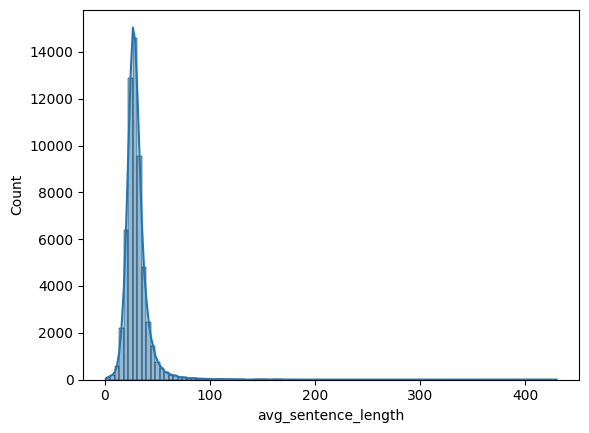

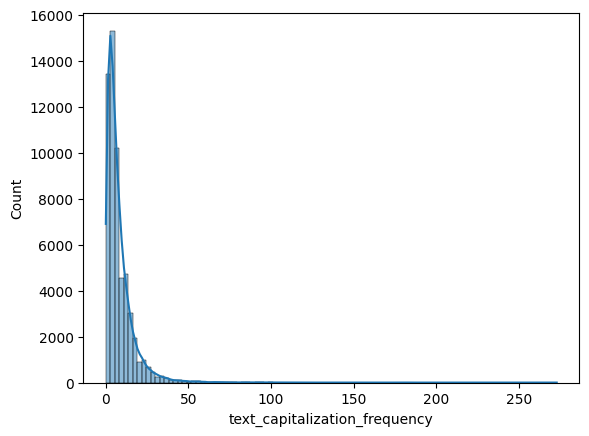

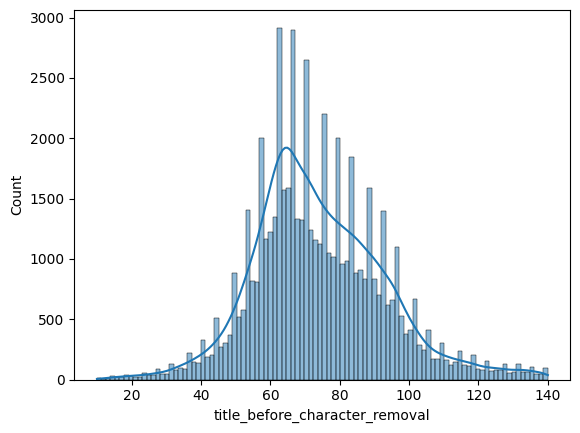

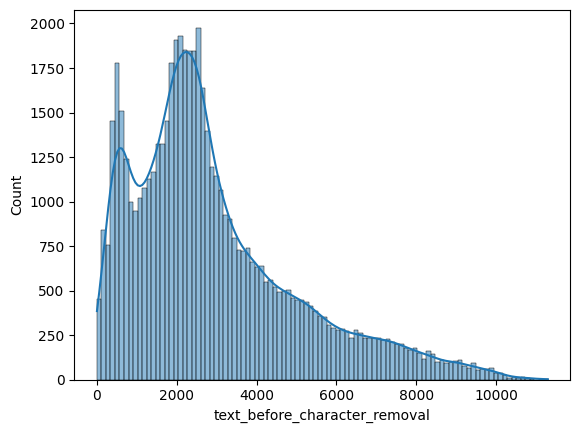

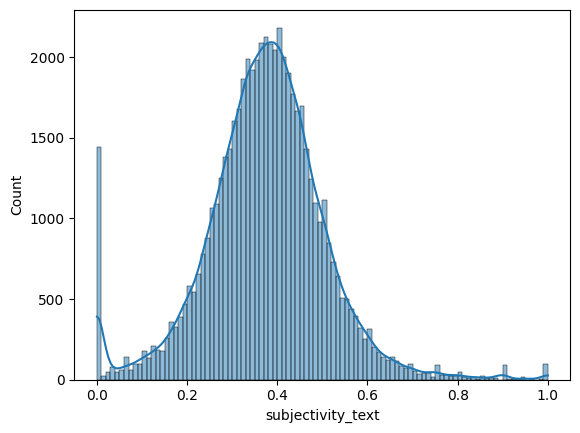

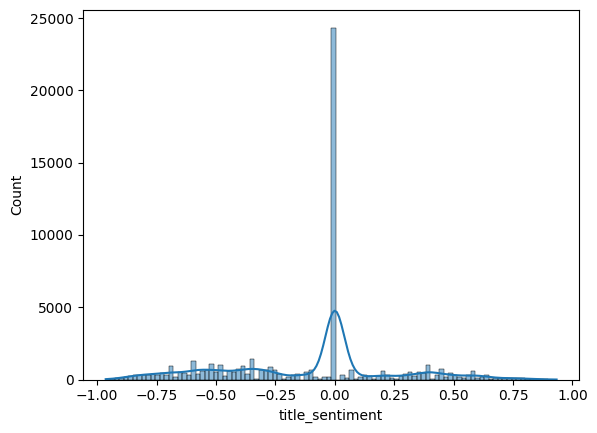

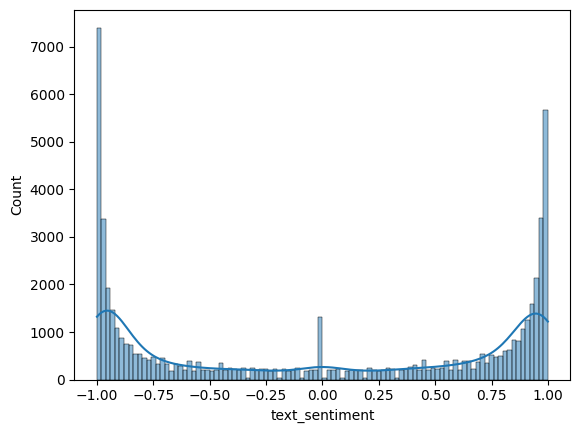

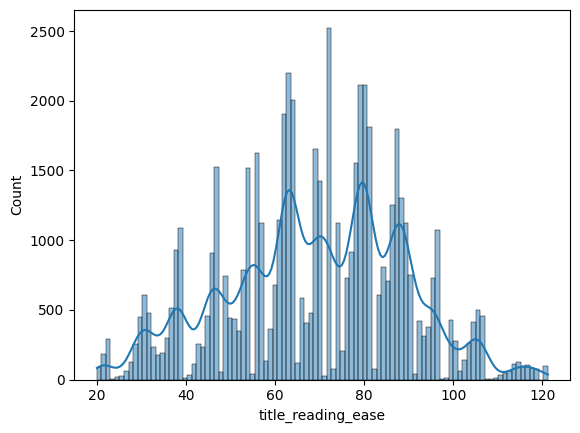

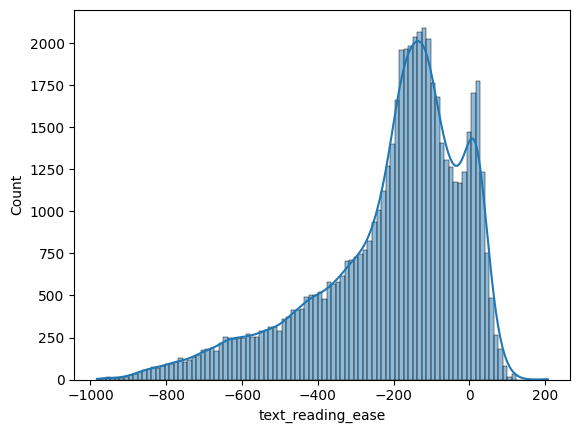

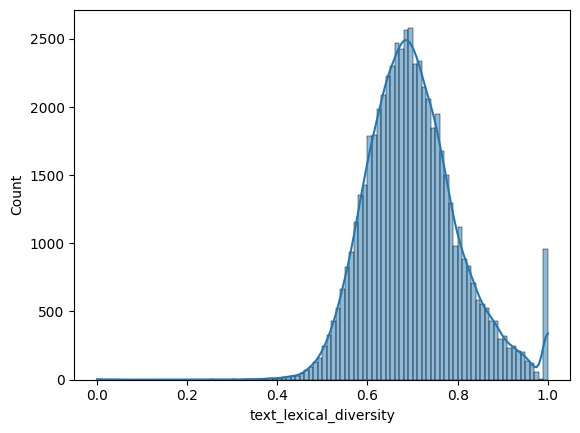

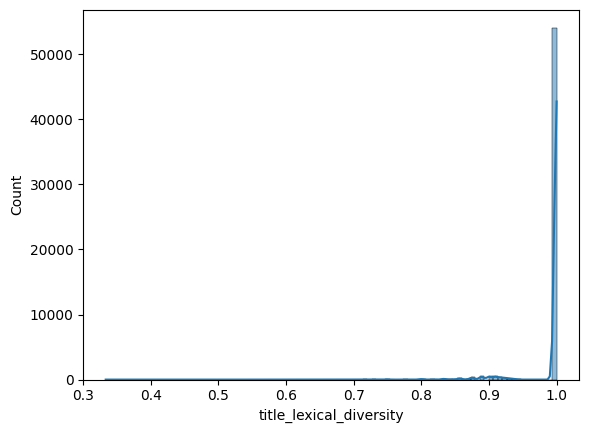

In [13]:
col=df_new_features_2.columns
for i in col:
    sns.histplot(df_new_features[i], bins=100, kde=True)
    plt.show()

In [14]:
non_object_df=df.drop(columns=['index','text','title','title_processed','text_processed','text_punctuation_frequency'
                                   ,'title_punctuation_frequency'
                              ])

'''
,'title_reading_ease','word_count','avg_word_length','text_capitalization_frequency'
                               ,'text_before_character_removal','text_sentiment','text_sentiment_OG','text_reading_ease',
                               'avg_sentence_length','text_after_character_removal','title_sentiment','title_sentiment_OG'
'''

correlation_matrix = non_object_df.corr().abs()
correlation_with_label = correlation_matrix['label']

# To view the correlations with the 'label' column
print(correlation_with_label)
# To view the correlation matrix

KeyError: "['index', 'text', 'title', 'title_processed', 'text_processed', 'text_punctuation_frequency', 'title_punctuation_frequency'] not found in axis"